In [1]:
import nltk
nltk.download("vader_lexicon")
import pandas as pd

[nltk_data] Downloading package vader_lexicon to C:\Users\Muhammad Ade
[nltk_data]     Aulia\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
df = pd.read_csv('data/hasil_terjemahan.csv', index_col=0)
df

,full_text,tweet_english
0,info star safety sama universitas insan budi u...,info star safety with human university Budi UT...
1,moga program di bawa sangat bantu generasi mud...,let's hope the program is very helpful to the ...
2,ikn program jajah tiap warga negara dukung ipk...,ikn jajah program every citizen supports ipk 2...
3,alhamdulillah mungkin prabowogibran komitmen t...,alhamdulillah maybe prabowogibran commitment t...
4,dulu tentang habis habis program bangun iknmak...,first about the end of the program to build it...
...,...,...
979,sih isu kata israel buka kantor dagang macam t...,the word issue israel open a trading office li...
980,tbf gw kontra semua program atas ikn sempet kr...,tbf gw contra all programs on IKN sempet criti...
981,6 program makan gratis 5 tahun 7 jual kaving ikn,6 free meal programs 5 years 7 selling kaving ikn
982,wujud tahan pangan ikn program tani milenial k...,form of food security ikn millennial farmer pr...


## LABELING

In [3]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sentiments = SentimentIntensityAnalyzer()
df['positif'] = [sentiments.polarity_scores(i)["pos"] for i in df['tweet_english']]
df['negatif'] = [sentiments.polarity_scores(i)["neg"] for i in df['tweet_english']]
df['Compound'] = [sentiments.polarity_scores(i)["compound"] for i in df['tweet_english']]
df

,full_text,tweet_english,positif,negatif,Compound
0,info star safety sama universitas insan budi u...,info star safety with human university Budi UT...,0.227,0.000,0.6486
1,moga program di bawa sangat bantu generasi mud...,let's hope the program is very helpful to the ...,0.353,0.000,0.7178
2,ikn program jajah tiap warga negara dukung ipk...,ikn jajah program every citizen supports ipk 2...,0.172,0.000,0.3612
3,alhamdulillah mungkin prabowogibran komitmen t...,alhamdulillah maybe prabowogibran commitment t...,0.206,0.000,0.3818
4,dulu tentang habis habis program bangun iknmak...,first about the end of the program to build it...,0.000,0.105,-0.2755
...,...,...,...,...,...
979,sih isu kata israel buka kantor dagang macam t...,the word issue israel open a trading office li...,0.128,0.000,0.3612
980,tbf gw kontra semua program atas ikn sempet kr...,tbf gw contra all programs on IKN sempet criti...,0.000,0.167,-0.3818
981,6 program makan gratis 5 tahun 7 jual kaving ikn,6 free meal programs 5 years 7 selling kaving ikn,0.355,0.000,0.5106
982,wujud tahan pangan ikn program tani milenial k...,form of food security ikn millennial farmer pr...,0.124,0.000,0.3400


In [4]:
score = df['Compound'].values
sentiment = []
for i in score:
  if i >= 0.05:
    sentiment.append("positif")
  else:
    sentiment.append("negatif")
df["Sentiment"] = sentiment
df

,full_text,tweet_english,positif,negatif,Compound,Sentiment
0,info star safety sama universitas insan budi u...,info star safety with human university Budi UT...,0.227,0.000,0.6486,positif
1,moga program di bawa sangat bantu generasi mud...,let's hope the program is very helpful to the ...,0.353,0.000,0.7178,positif
2,ikn program jajah tiap warga negara dukung ipk...,ikn jajah program every citizen supports ipk 2...,0.172,0.000,0.3612,positif
3,alhamdulillah mungkin prabowogibran komitmen t...,alhamdulillah maybe prabowogibran commitment t...,0.206,0.000,0.3818,positif
4,dulu tentang habis habis program bangun iknmak...,first about the end of the program to build it...,0.000,0.105,-0.2755,negatif
...,...,...,...,...,...,...
979,sih isu kata israel buka kantor dagang macam t...,the word issue israel open a trading office li...,0.128,0.000,0.3612,positif
980,tbf gw kontra semua program atas ikn sempet kr...,tbf gw contra all programs on IKN sempet criti...,0.000,0.167,-0.3818,negatif
981,6 program makan gratis 5 tahun 7 jual kaving ikn,6 free meal programs 5 years 7 selling kaving ikn,0.355,0.000,0.5106,positif
982,wujud tahan pangan ikn program tani milenial k...,form of food security ikn millennial farmer pr...,0.124,0.000,0.3400,positif


## VISUALIZATION

In [5]:
tb_counts = df.Sentiment.value_counts()
tb_counts

Sentiment
positif    678
negatif    306
Name: count, dtype: int64

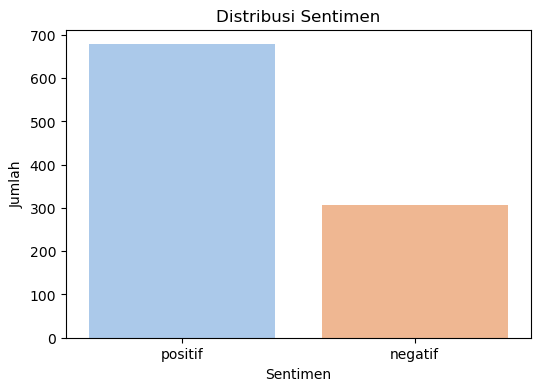

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

# Visualisasi
sns.set_palette("pastel")
plt.figure(figsize=(6, 4))
sns.countplot(x='Sentiment', data=df)
plt.title('Distribusi Sentimen')
plt.xlabel('Sentimen')
plt.ylabel('Jumlah')
plt.show()

In [7]:
data_negatif = df[df['Sentiment'] == 'negatif']
data_positif = df[df['Sentiment'] == 'positif']

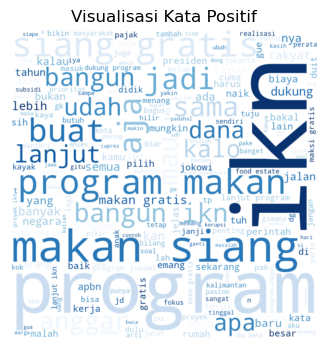

In [8]:
all_text_s1 = ' '.join(word for word in data_positif["full_text"])
wordcloud = WordCloud(colormap='Blues', width=1000, height=1000, mode="RGBA", background_color='white').generate(all_text_s1)
plt.figure(figsize=(6, 4))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Visualisasi Kata Positif")
plt.margins(x=0, y=0)
plt.show()

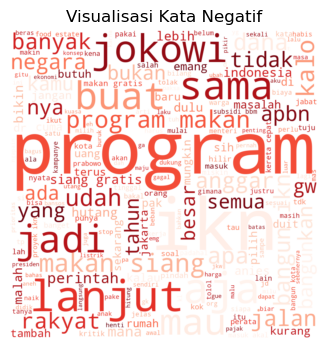

In [9]:
all_text_s0 = ' '.join(word for word in data_negatif["full_text"])
wordcloud = WordCloud(colormap='Reds', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_text_s0)
plt.figure(figsize=(6, 4))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Visualisasi Kata Negatif")
plt.margins(x=0, y=0)
plt.show()

## SPLITING DATA

In [10]:
X=df.full_text
y=df.Sentiment

In [11]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.15, random_state=42)

In [12]:
print('Banyak data x_train :',len(x_train))
print('Banyak data x_test  :',len(x_test))
print('Banyak data y_train :',len(y_train))
print('Banyak data y_test  :',len(y_test))

Banyak data x_train : 836
Banyak data x_test  : 148
Banyak data y_train : 836
Banyak data y_test  : 148


## TRAINING DATA (NAIVE BAYES CLASSIFIER)

In [13]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer, HashingVectorizer
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

cvec=CountVectorizer()
tvec=TfidfVectorizer()
hvec=HashingVectorizer()

In [14]:
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB

clf1 = MultinomialNB() 

In [15]:
from sklearn.pipeline import Pipeline

model1 = Pipeline([('vectorizer',tvec)
                 ,('classifier',clf1)])

In [16]:
model1.fit(x_train,y_train)

Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                ('classifier', MultinomialNB())])

In [17]:
hasil1=model1.predict(x_test)

In [18]:
matrix = classification_report(y_test,hasil1)
print('Classification report before SMOTE : \n\n',matrix)

Classification report before SMOTE : 

               precision    recall  f1-score   support

     negatif       0.00      0.00      0.00        55
     positif       0.63      1.00      0.77        93

    accuracy                           0.63       148
   macro avg       0.31      0.50      0.39       148
weighted avg       0.39      0.63      0.48       148



c:\Users\Muhammad Ade Aulia\miniconda3\envs\gpu_load\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Muhammad Ade Aulia\miniconda3\envs\gpu_load\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Muhammad Ade Aulia\miniconda3\envs\gpu_load\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

## WITH SMOTE

In [19]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer, HashingVectorizer
from sklearn.metrics import classification_report, accuracy_score

vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(x_train)
X_test_vec = vectorizer.transform(x_test)

In [20]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_vec, y_train)

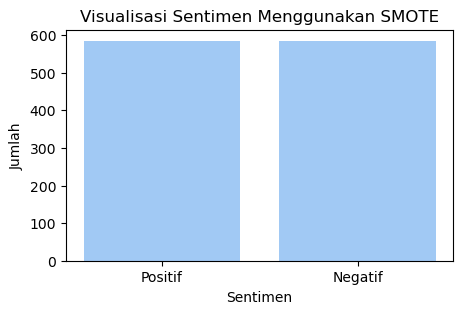

In [21]:
sentimen_counts = y_train_resampled.value_counts()

sns.set_palette("pastel")
plt.figure(figsize=(5, 3))
plt.bar(sentimen_counts.index, sentimen_counts.values)
plt.xlabel('Sentimen')
plt.ylabel('Jumlah')
plt.title('Visualisasi Sentimen Menggunakan SMOTE')
plt.xticks(sentimen_counts.index, ['Positif', 'Negatif'])
plt.show()

In [22]:
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()
nb.fit(X_train_resampled, y_train_resampled)

MultinomialNB()

In [23]:
y_pred = nb.predict(X_test_vec)

In [24]:
# Evaluasi Model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred, target_names=['negatif', 'positif'])

print("Classification report after SMOTE :\n\n", classification_rep)

Classification report after SMOTE :

               precision    recall  f1-score   support

     negatif       0.76      0.35      0.47        55
     positif       0.71      0.94      0.81        93

    accuracy                           0.72       148
   macro avg       0.73      0.64      0.64       148
weighted avg       0.73      0.72      0.68       148

